Random Forest to predict popularity

In [11]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate

In [12]:
df = pd.read_csv('project_preprocess.csv')
df.head()

,day_elapse,achievements,average_playtime,median_playtime,price,positive_percentage,english_0,english_1,required_age_0,required_age_3,...,Werewolves,Western,Word Game,World War I,World War II,Wrestling,Zombies,e-sports,popularity,positive_ratings
0,-7.584710,-0.128306,9.557829,0.072624,0.141186,1.110537,0,1,1,0,...,0,0,0,0,0,0,0,0,Main Stream,124534
1,-8.329745,-0.128306,0.069619,-0.035710,-0.265175,0.536451,0,1,1,0,...,0,0,0,0,0,0,0,0,Main Stream,3318
2,-6.414491,-0.128306,0.020358,-0.047606,-0.265175,0.775589,0,1,1,0,...,0,0,0,0,1,0,0,0,Main Stream,3416
3,-7.312387,-0.128306,0.059220,0.016120,-0.265175,0.480095,0,1,1,0,...,0,0,0,0,0,0,0,0,Main Stream,1273
4,-8.054853,-0.128306,0.259548,0.114258,-0.265175,0.999691,0,1,1,0,...,0,0,0,0,0,0,0,0,Main Stream,5250


In [13]:
(df_train,df_test) = train_test_split(df,train_size=0.8,test_size=0.2,random_state=0)

In [14]:
X_train = df_train.drop('popularity', axis = 1).drop('positive_ratings', axis = 1)
y_train = df_train['popularity']
X_test = df_test.drop('popularity', axis = 1).drop('positive_ratings', axis = 1)
y_test = df_test['popularity']

In [15]:
X_train.head()

,day_elapse,achievements,average_playtime,median_playtime,price,positive_percentage,english_0,english_1,required_age_0,required_age_3,...,Warhammer 40K,Web Publishing.1,Werewolves,Western,Word Game,World War I,World War II,Wrestling,Zombies,e-sports
9267,0.015931,0.058841,-0.081995,-0.062050,0.623739,-0.753527,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
19313,0.492496,-0.099950,-0.081995,-0.062050,-0.557247,0.152070,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
26925,1.060264,-0.128306,-0.081995,-0.062050,-0.771856,-0.204680,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
121,-4.734309,-0.046075,6.717113,0.734522,0.115788,1.037266,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2092,-0.992435,-0.077266,-0.081995,-0.062050,3.036506,-0.374186,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
y_train.head()

9267     Low popularity
19313    Low popularity
26925    Low popularity
121         Main Stream
2092      Obscure games
Name: popularity, dtype: object


         best B = {'n_estimators': 80}
  validation R2 = 0.813


<AxesSubplot:xlabel='trees'>

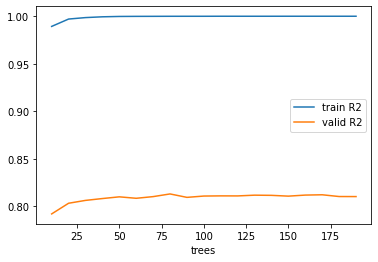

In [17]:
B = np.arange(10,200,10)
grid = {'n_estimators':B}

rf = RandomForestClassifier()
rfCV = GridSearchCV(rf,param_grid=grid,return_train_score=True,n_jobs=-1)
rfCV.fit(X_train,y_train)

print()
print('         best B =',rfCV.best_params_)
print('  validation R2 =',rfCV.best_score_.round(3))

results = pd.DataFrame()
results['trees'] = grid['n_estimators']
results['train R2'] = rfCV.cv_results_['mean_train_score']
results['valid R2']  = rfCV.cv_results_['mean_test_score']
ax1 = results.plot.line(x='trees',y='train R2')
results.plot.line(x='trees',y='valid R2',ax=ax1)

In [18]:
print('test R2',rfCV.score(X_test,y_test).round(3))

test R2 0.811


Baseline was: 0.687

(18596/df['popularity'].count()).round(3)


Random forest did pretty well